In [1]:
import os
import numpy as np 
import pandas as pd 
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
%matplotlib inline

import h5py
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras import regularizers, optimizers
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils import plot_model

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/happy-house-dataset/train_happy.h5
/kaggle/input/happy-house-dataset/test_happy.h5


In [3]:
''' train and test path '''
test_path = h5py.File("../input/happy-house-dataset/test_happy.h5")
train_path = h5py.File("../input/happy-house-dataset/train_happy.h5")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


In [4]:
''' X_train, X_test, y_train, y_test '''

X_train = np.array(train_path['train_set_x'])
y_train = np.array(train_path['train_set_y'])
X_test = np.array(test_path['test_set_x'])
y_test = np.array(test_path['test_set_y'])

''' Checking shape of X_train and X_test'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train.shape)

(600, 64, 64, 3)
(600,)
(150, 64, 64, 3)
(150,)


In [5]:
''' normalizing images '''
X_train = X_train / 255

X_test = X_test/255

In [6]:
''' reshapig '''
y_train = y_train.reshape((600,1))
y_test = y_test.reshape((150,1))

''' checking shape of y_train '''
y_train.shape

(600, 1)

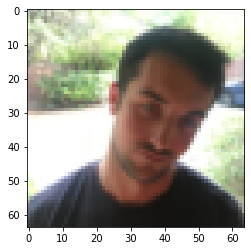

In [7]:
''' plotting an image '''
plt.imshow(X_train[0])

In [8]:
""" Model """

def cnn_model(input_shape):
  
    ''' input layers'''
    inp = Input(input_shape)
    
    ''' Zero Padding '''
    out = ZeroPadding2D((3, 3))(inp)
    
    ''' Convolutional Layer '''
    out = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(out)
    
    ''' Bathc Norm '''
    out = BatchNormalization(axis = 3, name = 'bn0')(out)
    
    ''' Activation '''
    out = Activation('relu')(out)

    ''' MaxPooling  '''
    out = MaxPooling2D((2, 2), name='max_pool')(out)

    ''' Flatterning the output '''
    out = Flatten()(out)
    
    ''' Classification Layer '''
    out= Dense(1, activation='sigmoid', name='fc')(out)

    ''' Model '''
    model = Model(inputs=X_input, outputs=out, name='HappyModel')

    return model

In [9]:
model = cnn_model(64)

''' lets see how model looks like '''
model.summary()

Model: "HappyModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0

In [10]:
''' compile the model '''
model.compile(loss='binary_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [11]:
''' training '''
model.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/50
38/38 [==============================] - 2s 64ms/step - loss: 1.0883 - accuracy: 0.6883 - val_loss: 0.6899 - val_accuracy: 0.6133
Epoch 2/50
38/38 [==============================] - 2s 61ms/step - loss: 0.3343 - accuracy: 0.8867 - val_loss: 1.0473 - val_accuracy: 0.5733
Epoch 3/50
38/38 [==============================] - 2s 61ms/step - loss: 0.1889 - accuracy: 0.9350 - val_loss: 0.5129 - val_accuracy: 0.6933
Epoch 4/50
38/38 [==============================] - 3s 68ms/step - loss: 0.1209 - accuracy: 0.9667 - val_loss: 0.3538 - val_accuracy: 0.8400
Epoch 5/50
38/38 [==============================] - 2s 59ms/step - loss: 0.1063 - accuracy: 0.9683 - val_loss: 0.2525 - val_accuracy: 0.9200
Epoch 6/50
38/38 [==============================] - 2s 57ms/step - loss: 0.0973 - accuracy: 0.9717 - val_loss: 0.2190 - val_accuracy: 0.9600
Epoch 7/50
38/38 [==============================] - 2s 57ms/step - loss: 0.0830 - accuracy: 0.9733 - val_loss: 0.1887 - val_accuracy: 0.9600
Epoch 8/50
38

In [12]:
''' evaluating the model'''
pred = model.evaluate(test_x,test_y)

print ("Loss = " + str(pred[0]))
print ("Test Accuracy = " + str(pred[1]))

5/5 [==============================] - 0s 19ms/step - loss: 0.7435 - accuracy: 0.8400
Loss = 0.7435131669044495
Test Accuracy = 0.8399999737739563
